In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

minEvaluations = [0.0, 0.01, 0.05, 0.1, 0.5, 0.9, 1.0]
# minEvaluations = [0.5]
images = ['triangle', 'circle', 'square']
image = ''
# images = ['triangle', 'circle', 'square', 'sct']

cmap = plt.cm.Blues
values = np.linspace(1 - (len(minEvaluations) / 10) + 0.1, 1.0, len(minEvaluations))
colors = [cmap(value) for value in values]

# colors = ['blue']
colorDict = dict(zip(minEvaluations, colors))
data = pd.read_csv('output_mbl_mfd.csv', delimiter=',')

data.rename(columns={'Mfd': 'fd'}, inplace=True)
data['Mfd'] = [(1 - abs(1.35 - v)) for v in data['fd']]
data = data[(data['minEvaluation'].isin(minEvaluations))]

def draw_correlation_heatmap(imageData, minEval, image, variables, labels=None):
    mblName = 'Mbl'
    mfdName = 'Mfd'
    newVariables = [*variables, mblName, mfdName]

    correlation_matrix = imageData[newVariables].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", cbar_kws={'label': 'Pearson correlation'}, vmin=-1, vmax=1)
    
    if labels:
        labels = {**labels, **{mblName: '$M_{\mathrm{bl}}$', mfdName: '$M_{\mathrm{fd}}$'}}
        labels = [labels.get(col, col) for col in newVariables]
        plt.xticks(ticks=[index + 0.5 for index in range(len(newVariables))], labels=labels, rotation=0)
        plt.yticks(ticks=[index + 0.5 for index in range(len(newVariables))], labels=labels, rotation=0)
        
    # plt.title(f'Pearson Correlation Heatmap: {image}, {minEval}')
    plt.show()


<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_1455/162049935.py:34: SyntaxWarning: invalid escape sequence '\m'
  labels = {**labels, **{mblName: '$M_{\mathrm{bl}}$', mfdName: '$M_{\mathrm{fd}}$'}}
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_1455/162049935.py:34: SyntaxWarning: invalid escape sequence '\m'
  labels = {**labels, **{mblName: '$M_{\mathrm{bl}}$', mfdName: '$M_{\mathrm{fd}}$'}}


# Liczba punktów krzywych Min i Max

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:66: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:79: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\m'
<>:87: SyntaxWarning: invalid escape sequence '\m'
<>:88: SyntaxWarning: invalid e

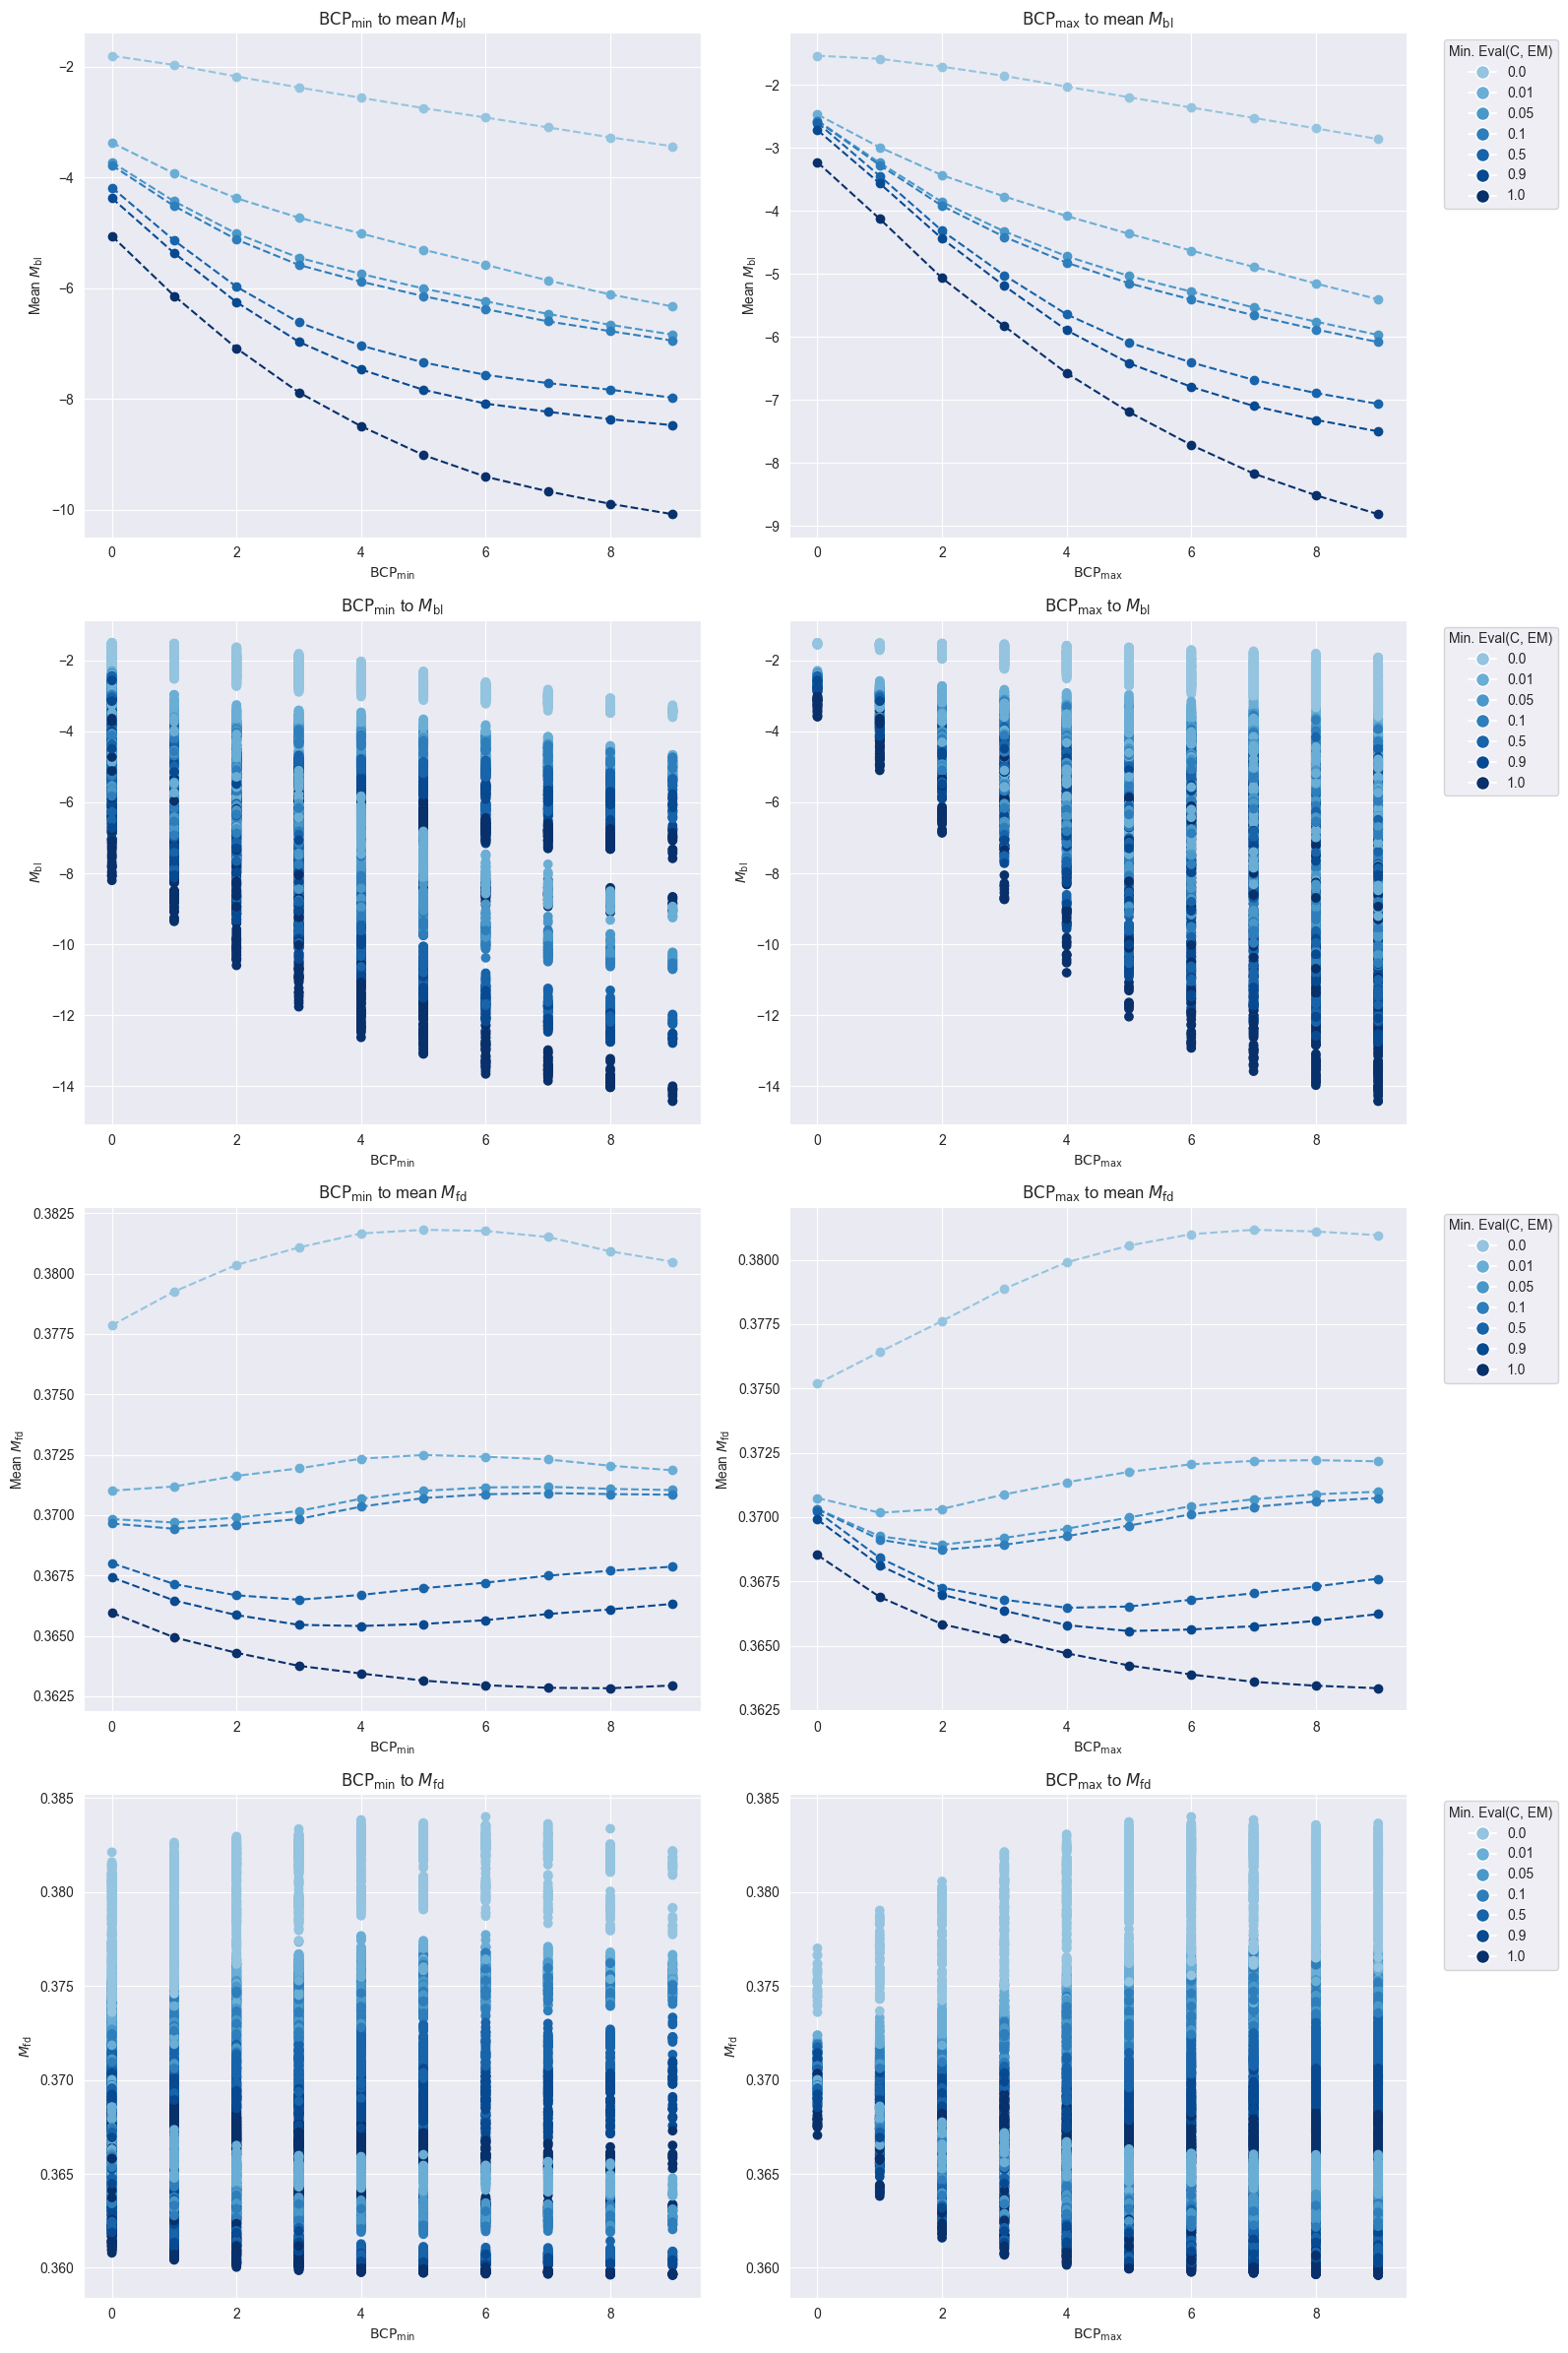

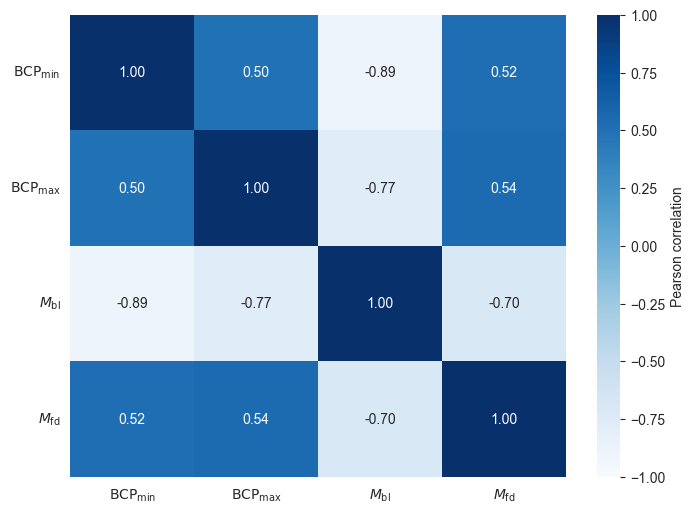

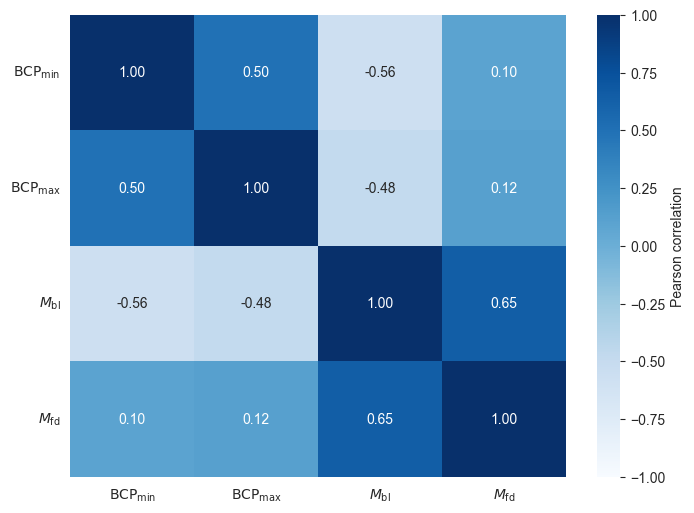

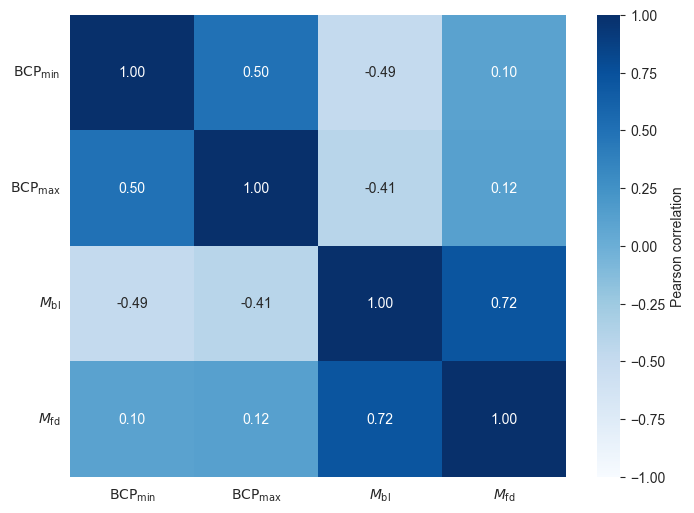

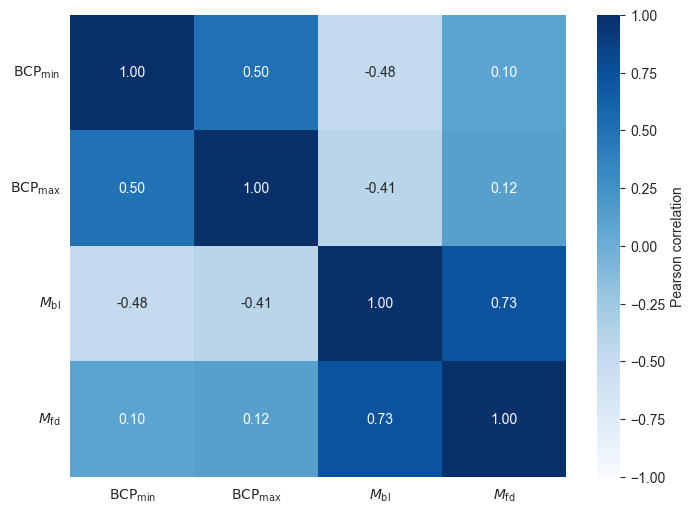

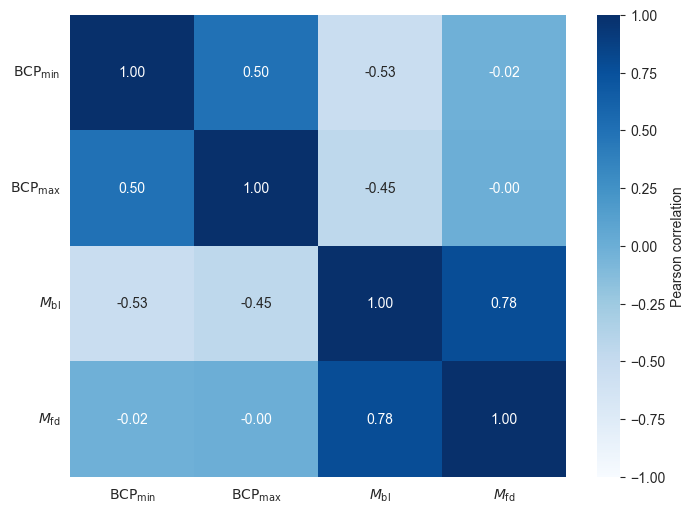

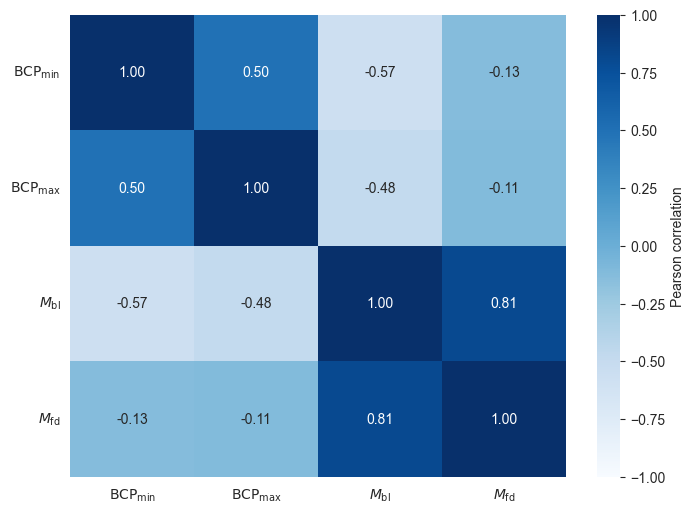

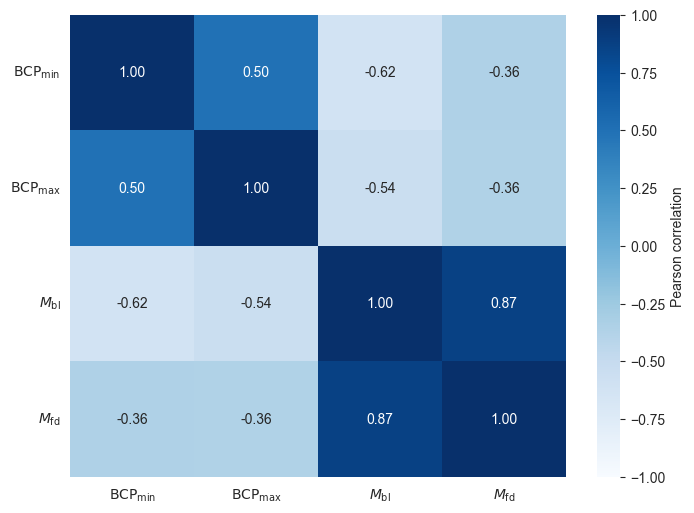

In [118]:
testName = 'points'
subset = data[(data['testName'] == testName)]

# for image in images:
#     imageData = subset[(subset['imageName'] == image)]
imageData = subset[(subset['imageName'].isin(images))]

if not imageData.empty:
    pointsMin = imageData['pointsMin']
    pointsMax = imageData['pointsMax']
    minEval = imageData['minEvaluation']

    mbl = imageData['Mbl']
    mfd = imageData['Mfd']

    fig, axs = plt.subplots(4, 2, figsize=(16, 24))
    
    # Wykresy dla Mbl
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mbl_mean = subset_eval.groupby('pointsMin')['Mbl'].mean()
        axs[0, 0].plot(mbl_mean.index, mbl_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 0].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{min}}$ to mean $M_{\mathrm{bl}}$')
    axs[0, 0].set_xlabel('$\mathrm{BCP}_{\mathrm{min}}$')
    axs[0, 0].set_ylabel('Mean $M_{\mathrm{bl}}$')
    # axs[0, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                       markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                            minEvaluations],
    #                   title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mbl_mean = subset_eval.groupby('pointsMax')['Mbl'].mean()
        axs[0, 1].plot(mbl_mean.index, mbl_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 1].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{max}}$ to mean $M_{\mathrm{bl}}$')
    axs[0, 1].set_xlabel('$\mathrm{BCP}_{\mathrm{max}}$')
    axs[0, 1].set_ylabel('Mean $M_{\mathrm{bl}}$')
    axs[0, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                          markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                               minEvaluations],
                      title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    sc1 = axs[1, 0].scatter(pointsMin, mbl, c=[colorDict[evalValue] for evalValue in minEval])
    axs[1, 0].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{min}}$ to $M_{\mathrm{bl}}$')
    axs[1, 0].set_xlabel('$\mathrm{BCP}_{\mathrm{min}}$')
    axs[1, 0].set_ylabel('$M_{\mathrm{bl}}$')
    # axs[1, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                      markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                           minEvaluations],
    #                  title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    sc2 = axs[1, 1].scatter(pointsMax, mbl, c=minEval.map(colorDict))
    axs[1, 1].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{max}}$ to $M_{\mathrm{bl}}$')
    axs[1, 1].set_xlabel('$\mathrm{BCP}_{\mathrm{max}}$')
    axs[1, 1].set_ylabel('$M_{\mathrm{bl}}$')
    axs[1, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                         markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                              minEvaluations],
                     title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy dla Mfd
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mfd_mean = subset_eval.groupby('pointsMin')['Mfd'].mean()
        axs[2, 0].plot(mfd_mean.index, mfd_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[2, 0].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{min}}$ to mean $M_{\mathrm{fd}}$')
    axs[2, 0].set_xlabel('$\mathrm{BCP}_{\mathrm{min}}$')
    axs[2, 0].set_ylabel('Mean $M_{\mathrm{fd}}$')
    # axs[2, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                       markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                            minEvaluations],
    #                   title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mfd_mean = subset_eval.groupby('pointsMax')['Mfd'].mean()
        axs[2, 1].plot(mfd_mean.index, mfd_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[2, 1].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{max}}$ to mean $M_{\mathrm{fd}}$')
    axs[2, 1].set_xlabel('$\mathrm{BCP}_{\mathrm{max}}$')
    axs[2, 1].set_ylabel('Mean $M_{\mathrm{fd}}$')
    axs[2, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                          markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                               minEvaluations],
                      title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    sc3 = axs[3, 0].scatter(pointsMin, mfd, c=minEval.map(colorDict))
    axs[3, 0].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{min}}$ to $M_{\mathrm{fd}}$')
    axs[3, 0].set_xlabel('$\mathrm{BCP}_{\mathrm{min}}$')
    axs[3, 0].set_ylabel('$M_{\mathrm{fd}}$')
    # axs[3, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                      markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                           minEvaluations],
    #                  title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    sc4 = axs[3, 1].scatter(pointsMax, mfd, c=minEval.map(colorDict))
    axs[3, 1].set_title(image.capitalize() + '$\mathrm{BCP}_{\mathrm{max}}$ to $M_{\mathrm{fd}}$')
    axs[3, 1].set_xlabel('$\mathrm{BCP}_{\mathrm{max}}$')
    axs[3, 1].set_ylabel('$M_{\mathrm{fd}}$')
    axs[3, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                         markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                              minEvaluations],
                     title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Automatyczne dopasowanie layoutu
    plt.grid(True)
    plt.show()
        
# for image in images:
# subset = data[(data[testName] == 'points') & (data['imageName'] == image)]
subset = data[(data['testName'] == testName) & (data['imageName'].isin(images))]
for minEval in minEvaluations:
    imageData = subset[subset['minEvaluation'] == minEval]
    if not imageData.empty:
        draw_correlation_heatmap(imageData, minEval, image, ['pointsMin', 'pointsMax'], {'pointsMin': '$\mathrm{BCP}_{\mathrm{min}}$', 'pointsMax': '$\mathrm{BCP}_{\mathrm{max}}$'})

# Mutacja

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:46: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:72: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid e

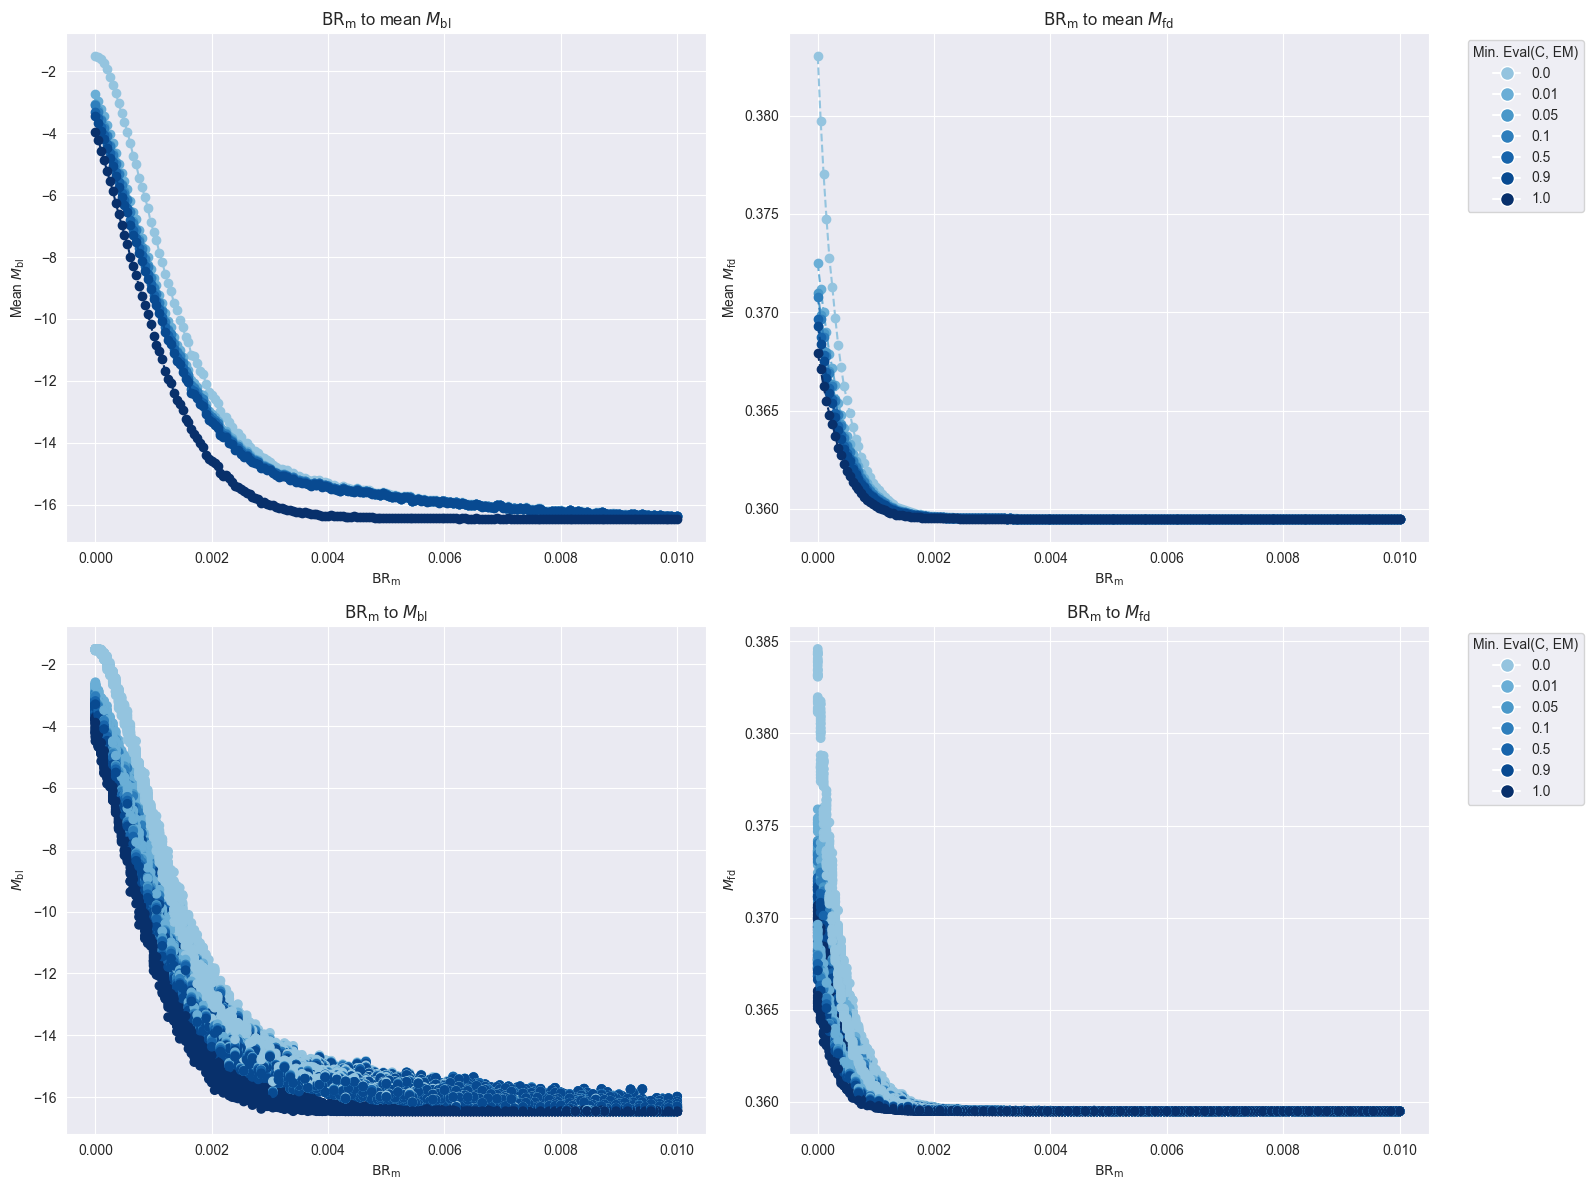

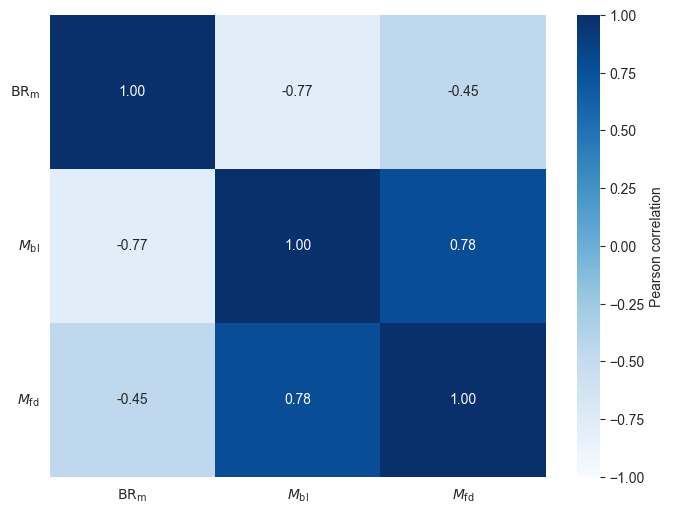

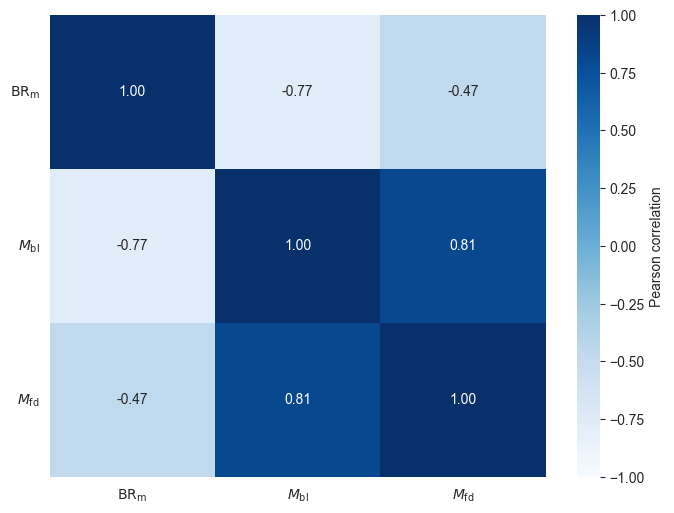

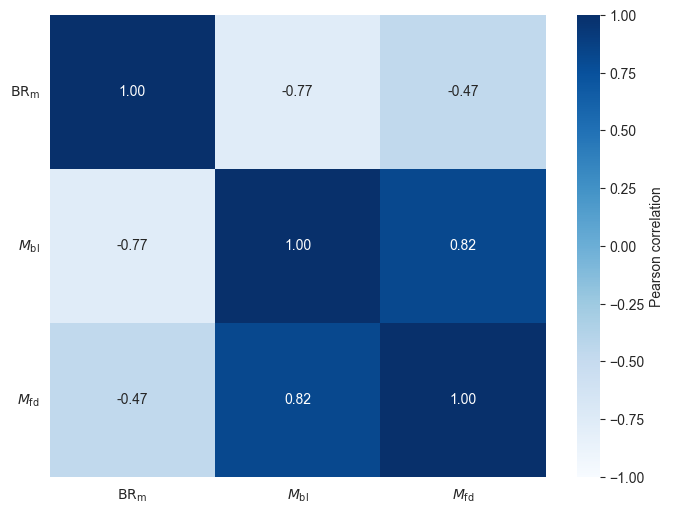

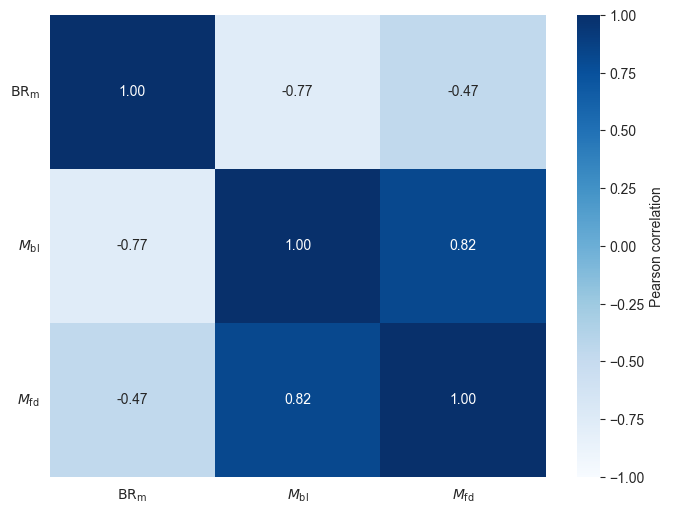

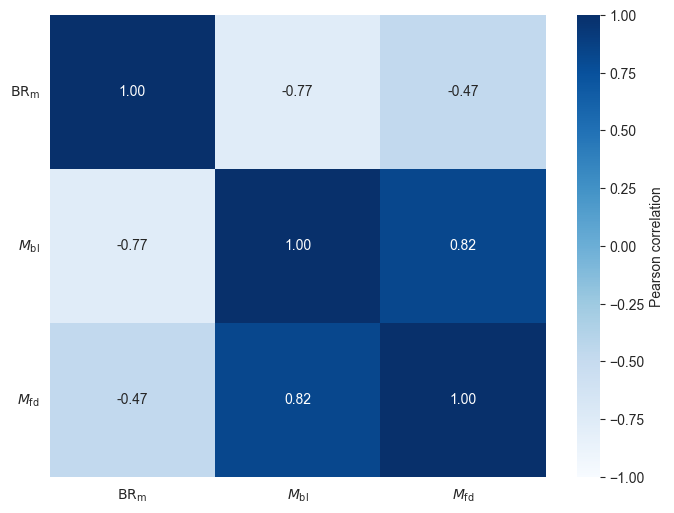

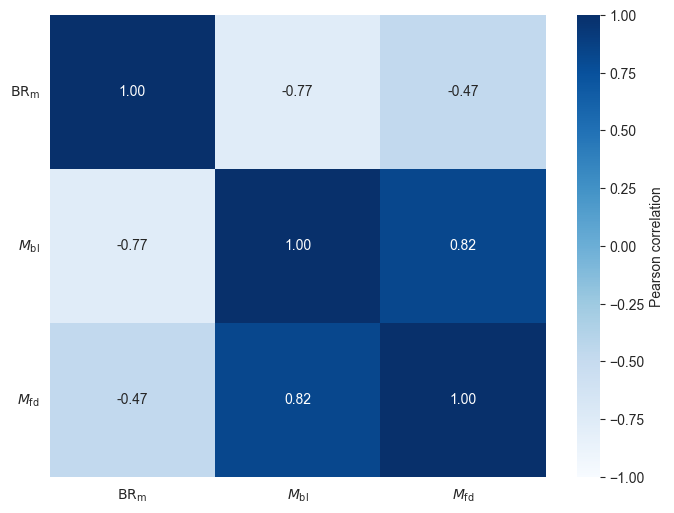

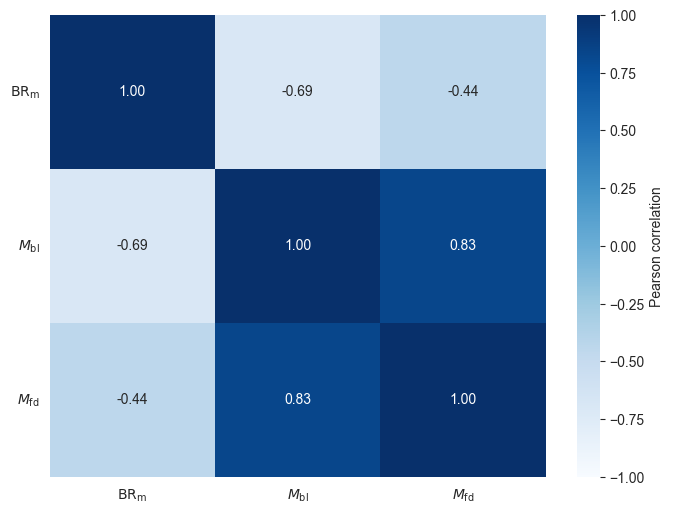

In [119]:
testName = 'mutation'
subset = data[(data['testName'] == testName)]

# for image in images:
#     imageData = subset[(subset['imageName'] == image)]
imageData = subset[(subset['imageName'].isin(images))]
if not imageData.empty:
    mutation = imageData['mutationChance']
    minEval = imageData['minEvaluation']

    mbl = imageData['Mbl']
    mfd = imageData['Mfd']

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Wykresy dla Mbl
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mbl_mean = subset_eval.groupby('mutationChance')['Mbl'].mean()
        axs[0, 0].plot(mbl_mean.index, mbl_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 0].set_title(image.capitalize() + '$\mathrm{BR}_{\mathrm{m}}$ to mean $M_{\mathrm{bl}}$')
    axs[0, 0].set_xlabel('$\mathrm{BR}_{\mathrm{m}}$')
    axs[0, 0].set_ylabel('Mean $M_{\mathrm{bl}}$')
    # axs[0, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                       markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                            minEvaluations],
    #                   title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy dla Mfd
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mfd_mean = subset_eval.groupby('mutationChance')['Mfd'].mean()
        axs[0, 1].plot(mfd_mean.index, mfd_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 1].set_title(image.capitalize() + '$\mathrm{BR}_{\mathrm{m}}$ to mean $M_{\mathrm{fd}}$')
    axs[0, 1].set_xlabel('$\mathrm{BR}_{\mathrm{m}}$')
    axs[0, 1].set_ylabel('Mean $M_{\mathrm{fd}}$')
    axs[0, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                          markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                               minEvaluations],
                      title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy scatter dla Mbl
    sc1 = axs[1, 0].scatter(mutation, mbl, c=[colorDict[evalValue] for evalValue in minEval])
    axs[1, 0].set_title(image.capitalize() + '$\mathrm{BR}_{\mathrm{m}}$ to $M_{\mathrm{bl}}$')
    axs[1, 0].set_xlabel('$\mathrm{BR}_{\mathrm{m}}$')
    axs[1, 0].set_ylabel('$M_{\mathrm{bl}}$')
    # axs[1, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                   markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                        minEvaluations],
    #               title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy scatter dla Mfd
    sc2 = axs[1, 1].scatter(mutation, mfd, c=[colorDict[evalValue] for evalValue in minEval])
    axs[1, 1].set_title(image.capitalize() + '$\mathrm{BR}_{\mathrm{m}}$ to $M_{\mathrm{fd}}$')
    axs[1, 1].set_xlabel('$\mathrm{BR}_{\mathrm{m}}$')
    axs[1, 1].set_ylabel('$M_{\mathrm{fd}}$')
    axs[1, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                      markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                           minEvaluations],
                  title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Automatyczne dopasowanie layoutu
    plt.grid(True)
    plt.show()
    
# for image in images:
#     subset = data[(data['testName'] == testName) & (data['imageName'] == image)]
subset = data[(data['testName'] == testName) & (data['imageName'].isin(images))]
for minEval in minEvaluations:
    imageData = subset[subset['minEvaluation'] == minEval]
    if not imageData.empty:
        draw_correlation_heatmap(imageData, minEval, image, ['mutationChance'], {'mutationChance': '$\mathrm{BR}_{\mathrm{m}}$'})

# Punkty krzyżowania

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:47: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
/var/folders/b4/2_zbw1nd54s0cdjd12nftxnm0000gn/T/ipykernel_1455/3966973834.py:21: SyntaxWarning: invalid escape sequence '\m'
  axs[0, 0].set_title(image.capitalize() + 'COP to mean $M

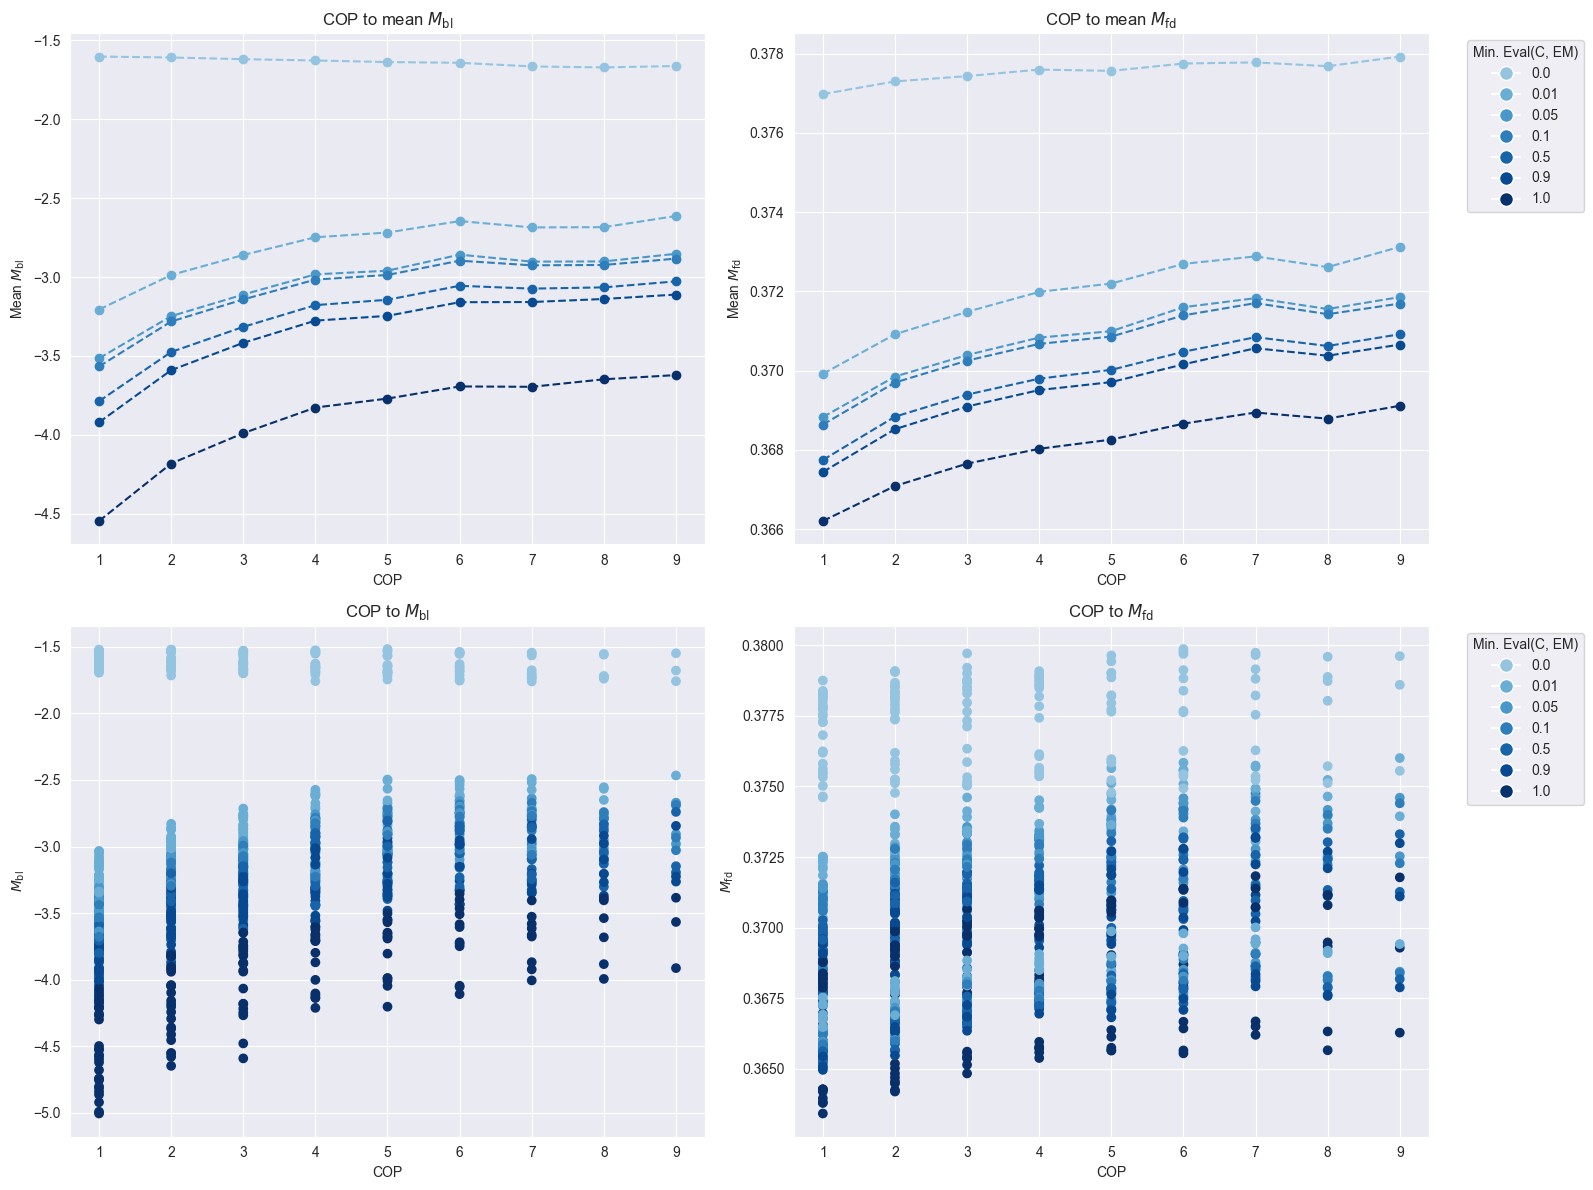

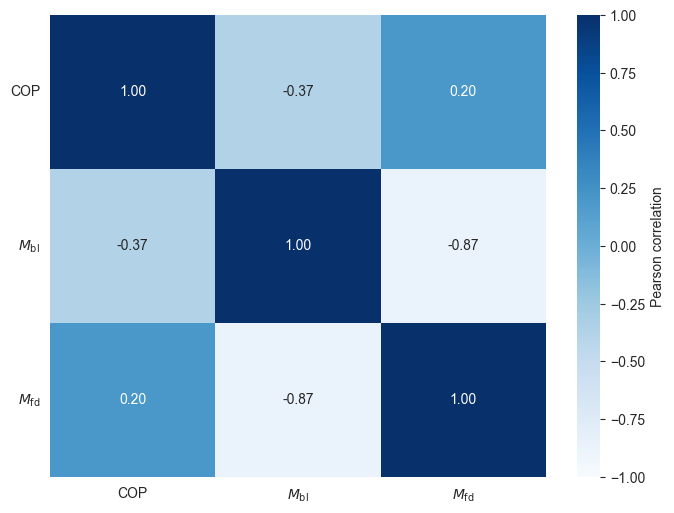

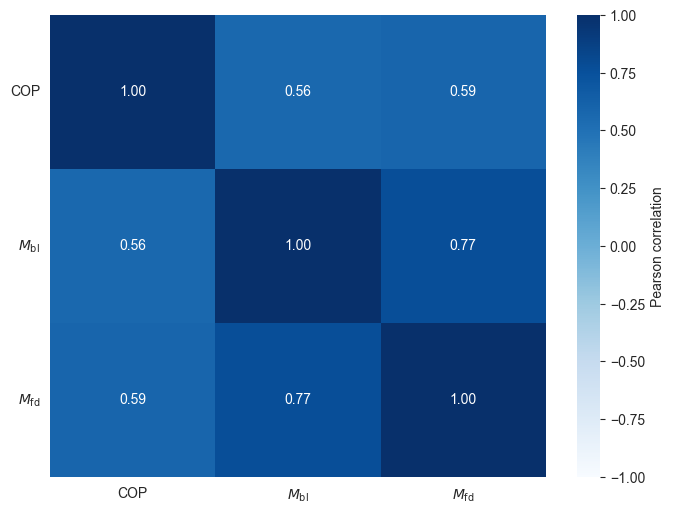

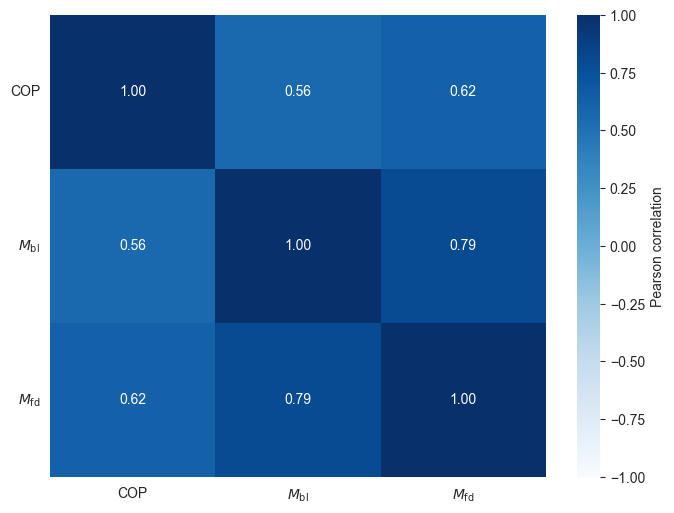

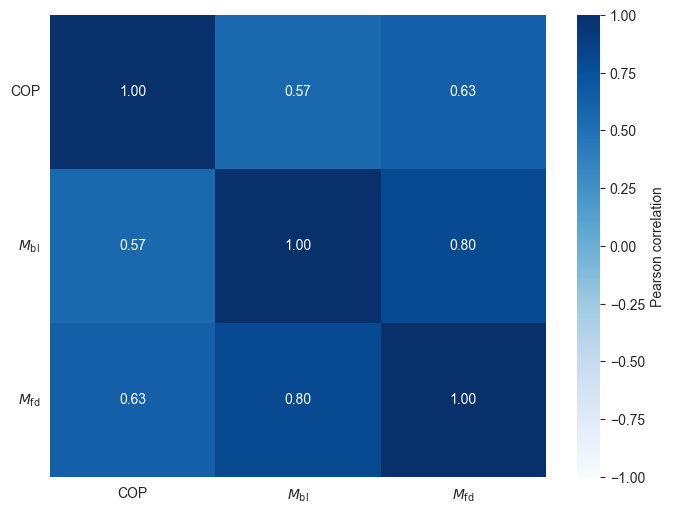

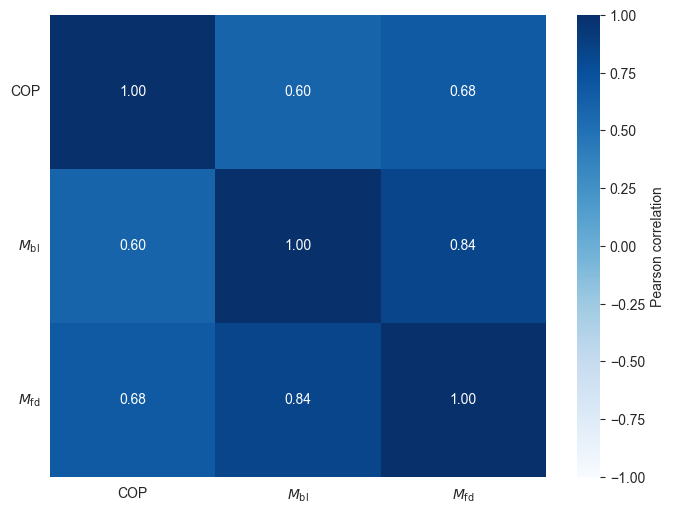

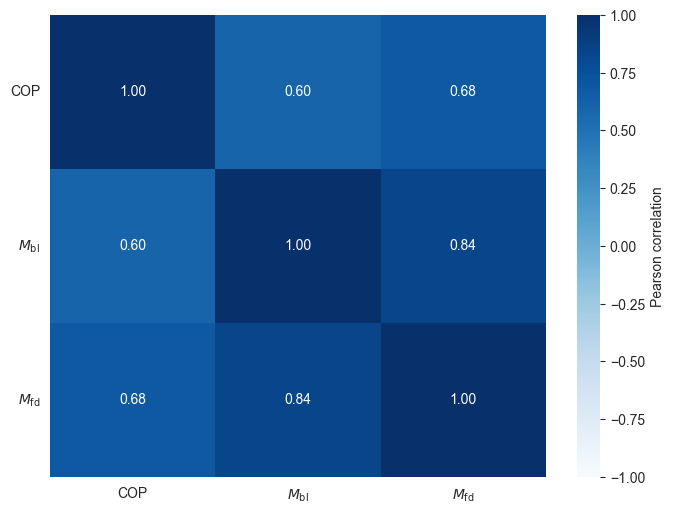

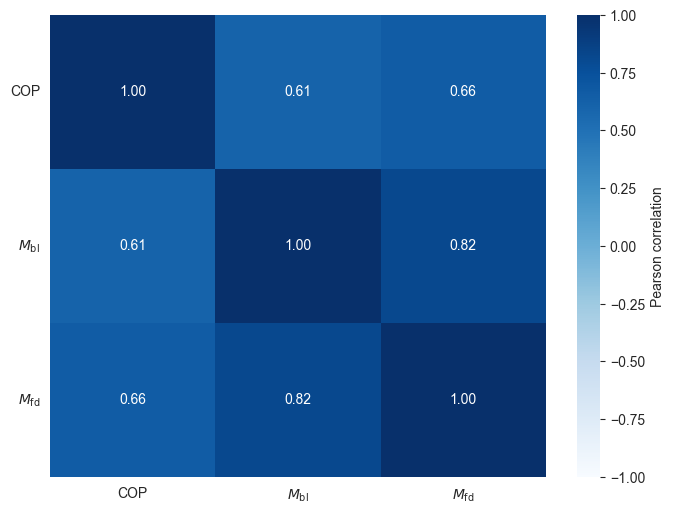

In [120]:
testName = 'crossoverPoints'
subset = data[(data['testName'] == testName)]

# for image in images:
#     imageData = subset[(subset['imageName'] == image) & (subset['crossoverPoints'] != 0)]
imageData = subset[(subset['imageName'].isin(images)) & (subset['crossoverPoints'] != 0)]
if not imageData.empty:
    crossoverPoints = imageData['crossoverPoints']
    minEval = imageData['minEvaluation']

    mbl = imageData['Mbl']
    mfd = imageData['Mfd']

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Wykresy dla Mbl
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mbl_mean = subset_eval.groupby('crossoverPoints')['Mbl'].mean()
        axs[0, 0].plot(mbl_mean.index, mbl_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 0].set_title(image.capitalize() + 'COP to mean $M_{\mathrm{bl}}$')
    axs[0, 0].set_xlabel('COP')
    axs[0, 0].set_ylabel('Mean $M_{\mathrm{bl}}$')
    # axs[0, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                       markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                            minEvaluations],
    #                   title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy dla Mfd
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mfd_mean = subset_eval.groupby('crossoverPoints')['Mfd'].mean()
        axs[0, 1].plot(mfd_mean.index, mfd_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 1].set_title(image.capitalize() + 'COP to mean $M_{\mathrm{fd}}$')
    axs[0, 1].set_xlabel('COP')
    axs[0, 1].set_ylabel('Mean $M_{\mathrm{fd}}$')
    axs[0, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                          markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                               minEvaluations],
                      title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')


    # Wykresy scatter plot dla Mbl
    sc1 = axs[1, 0].scatter(crossoverPoints, mbl, c=[colorDict[evalValue] for evalValue in minEval])
    axs[1, 0].set_title(image.capitalize() + 'COP to $M_{\mathrm{bl}}$')
    axs[1, 0].set_xlabel('COP')
    axs[1, 0].set_ylabel('$M_{\mathrm{bl}}$')
    # axs[1, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                   markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                        minEvaluations],
    #               title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy scatter plot dla Mfd
    sc2 = axs[1, 1].scatter(crossoverPoints, mfd, c=[colorDict[evalValue] for evalValue in minEval])
    axs[1, 1].set_title(image.capitalize() + 'COP to $M_{\mathrm{fd}}$')
    axs[1, 1].set_xlabel('COP')
    axs[1, 1].set_ylabel('$M_{\mathrm{fd}}$')
    axs[1, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                      markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                           minEvaluations],
                  title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()  # Automatyczne dopasowanie layoutu
    plt.grid(True)
    plt.show()
        
# for image in images:
#     subset = data[(data['testName'] == testName) & (data['imageName'] == image)]
subset = data[(data['testName'] == testName) & (data['imageName'].isin(images))]
for minEval in minEvaluations:
    imageData = subset[subset['minEvaluation'] == minEval]
    if not imageData.empty:
        draw_correlation_heatmap(imageData, minEval, image, ['crossoverPoints'], {'crossoverPoints': 'COP'})

# Krzyżowanie

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:53: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid e

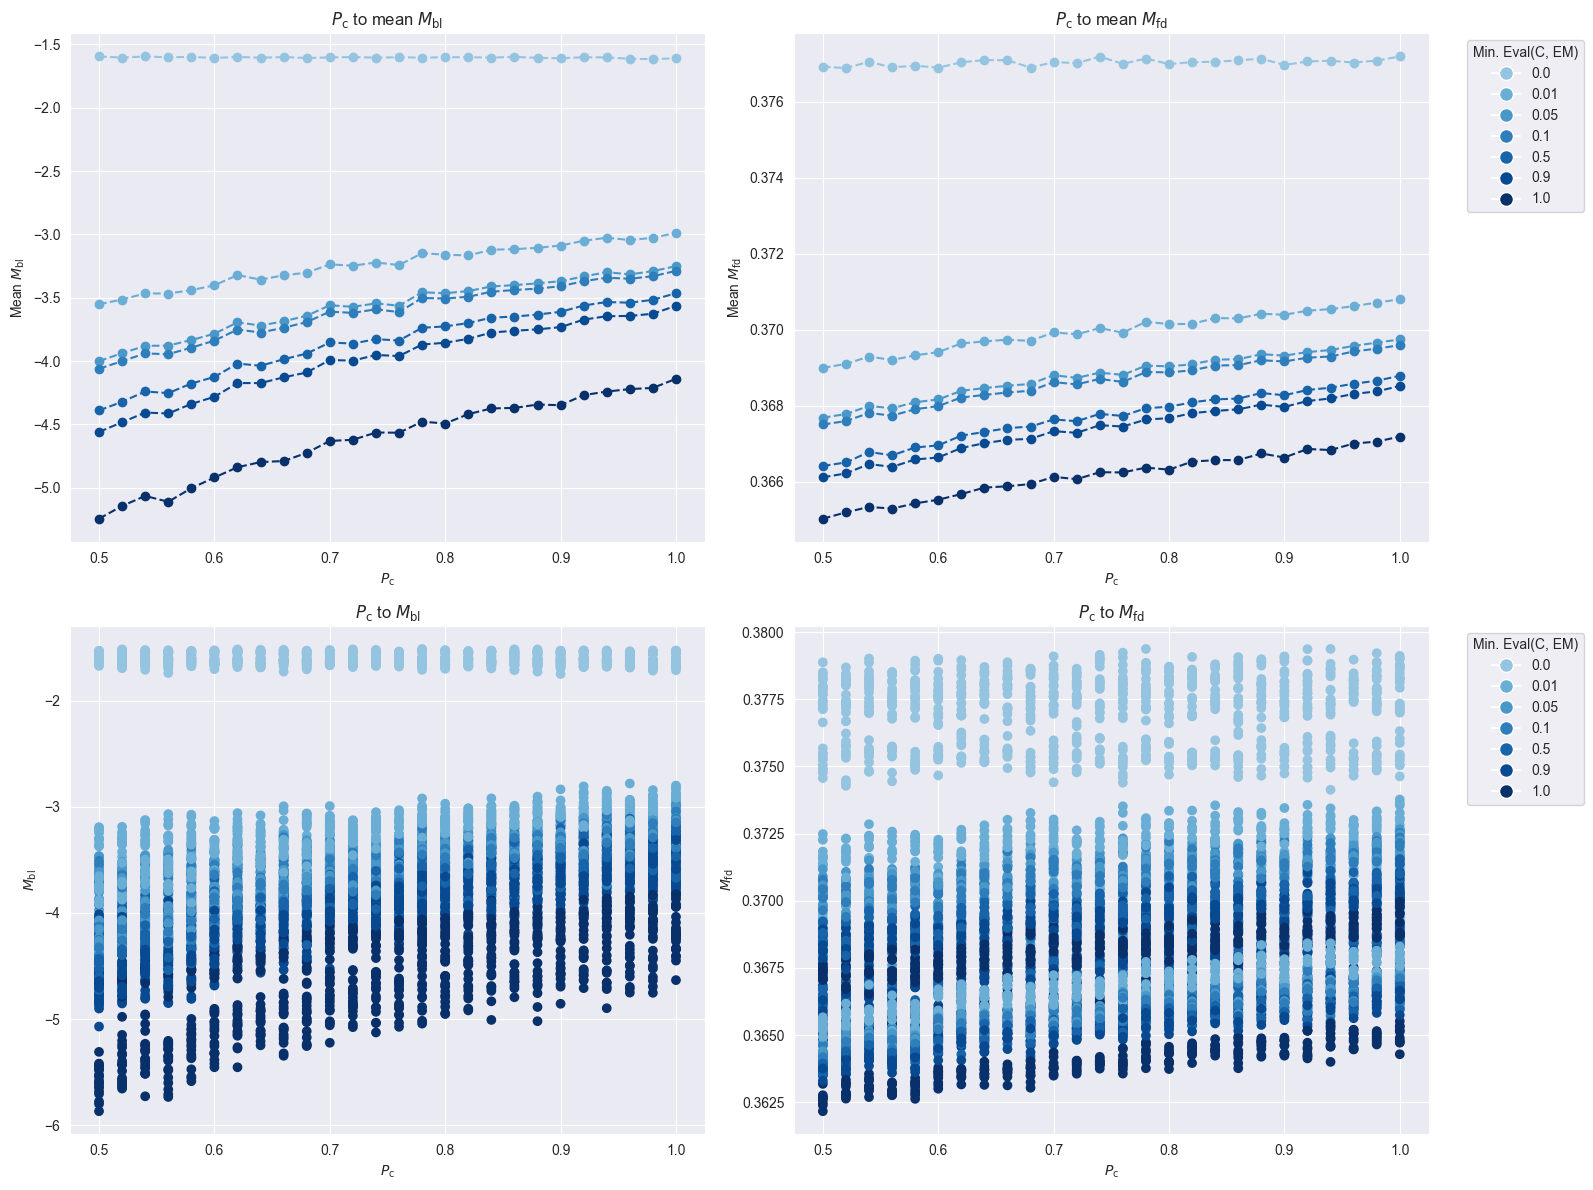

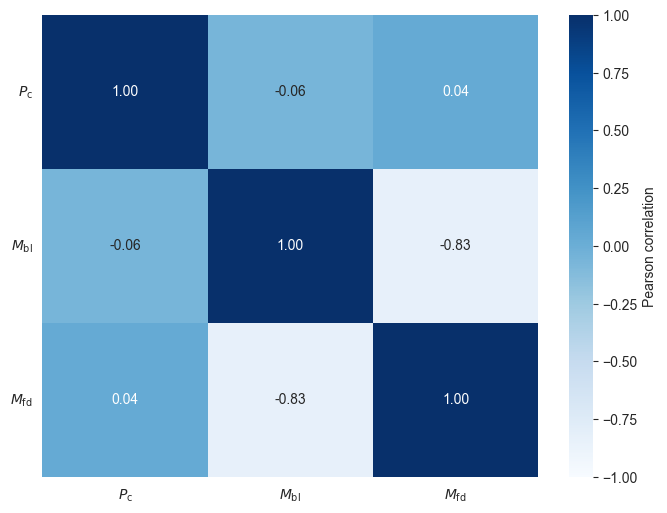

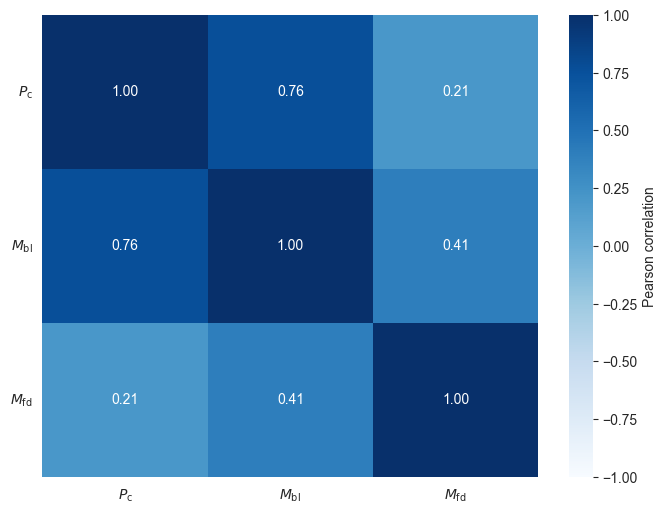

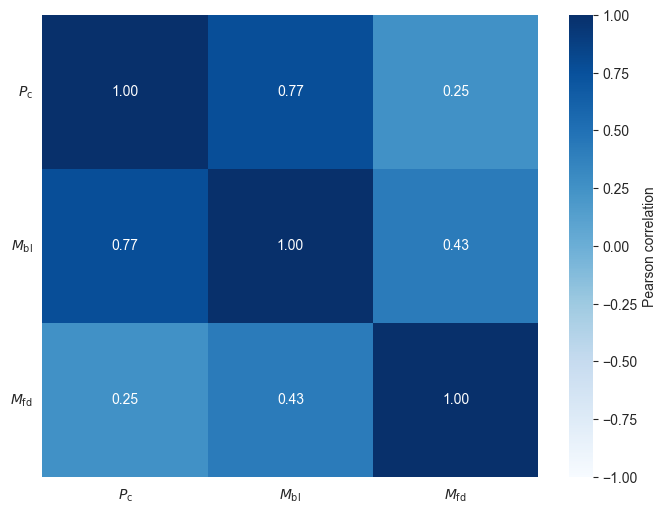

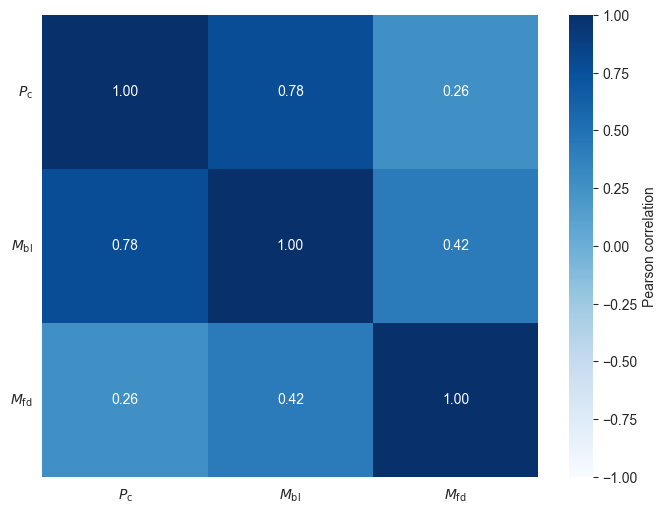

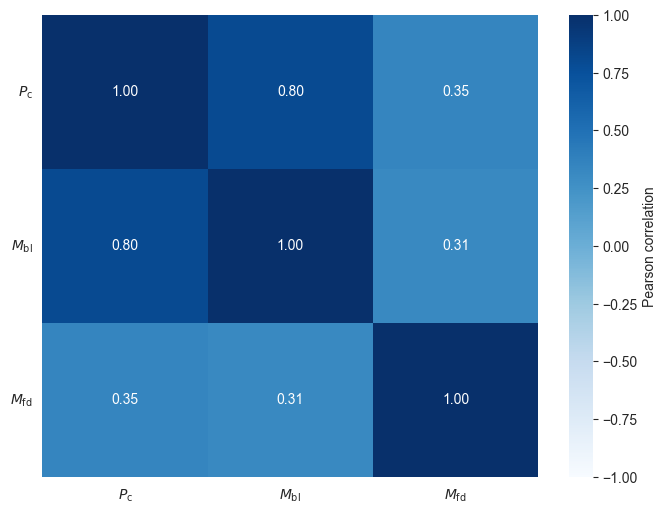

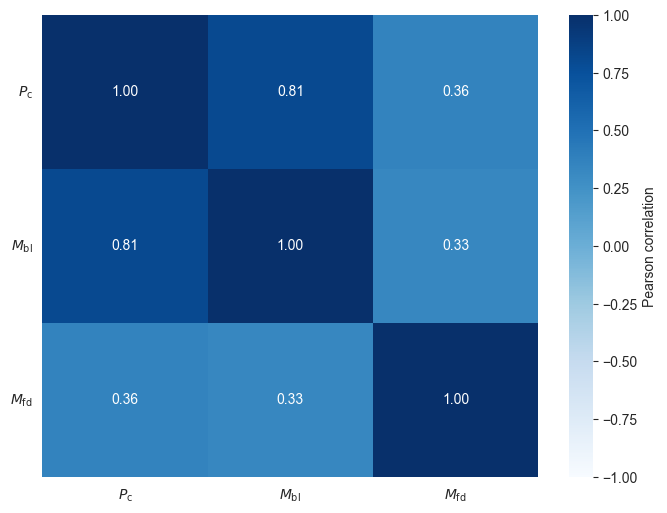

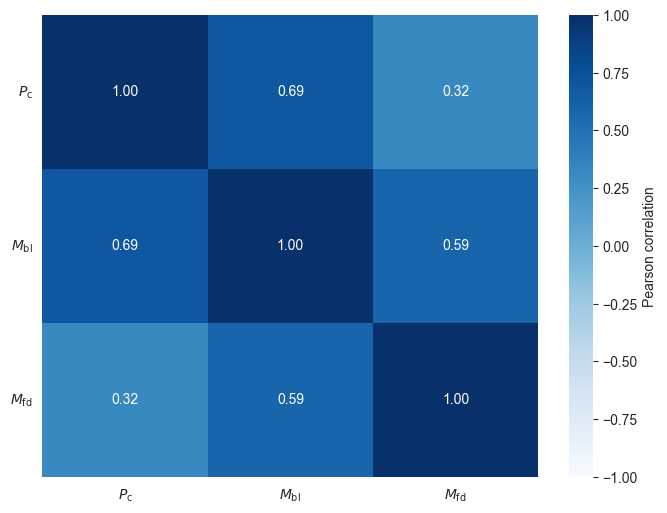

In [121]:
testName = 'crossover'
subset = data[(data['testName'] == testName)]

# for image in images:
#     imageData = subset[(subset['imageName'] == image)]
imageData = subset[(subset['imageName'].isin(images))]
if not imageData.empty:
    crossover = imageData['crossoverChance']
    minEval = imageData['minEvaluation']
    mbl = imageData['Mbl']
    mfd = imageData['Mfd']

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))

    # Wykresy dla Mbl
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mbl_mean = subset_eval.groupby('crossoverChance')['Mbl'].mean()
        axs[0, 0].plot(mbl_mean.index, mbl_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 0].set_title(image.capitalize() + '$P_{\mathrm{c}}$ to mean $M_{\mathrm{bl}}$')
    axs[0, 0].set_xlabel('$P_{\mathrm{c}}$')
    axs[0, 0].set_ylabel('Mean $M_{\mathrm{bl}}$')
    # axs[0, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                       markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                            minEvaluations],
    #                   title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy dla Mfd
    for i, evalValue in enumerate(minEvaluations):
        subset_eval = imageData[imageData['minEvaluation'] == evalValue]
        mfd_mean = subset_eval.groupby('crossoverChance')['Mfd'].mean()
        axs[0, 1].plot(mfd_mean.index, mfd_mean.values, label=str(evalValue), color=colors[i], linestyle='--', marker='o')
    axs[0, 1].set_title(image.capitalize() + '$P_{\mathrm{c}}$ to mean $M_{\mathrm{fd}}$')
    axs[0, 1].set_xlabel('$P_{\mathrm{c}}$')
    axs[0, 1].set_ylabel('Mean $M_{\mathrm{fd}}$')
    axs[0, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                          markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                               minEvaluations],
                      title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy scatter plot dla Mbl
    sc1 = axs[1, 0].scatter(crossover, mbl, c=[colorDict[evalValue] for evalValue in minEval])
    axs[1, 0].set_title(image.capitalize() + '$P_{\mathrm{c}}$ to $M_{\mathrm{bl}}$')
    axs[1, 0].set_xlabel('$P_{\mathrm{c}}$')
    axs[1, 0].set_ylabel('$M_{\mathrm{bl}}$')
    # axs[1, 0].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
    #                                       markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
    #                            minEvaluations],
    #                   title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Wykresy scatter plot dla Mfd
    sc2 = axs[1, 1].scatter(crossover, mfd, c=[colorDict[evalValue] for evalValue in minEval])
    axs[1, 1].set_title(image.capitalize() + '$P_{\mathrm{c}}$ to $M_{\mathrm{fd}}$')
    axs[1, 1].set_xlabel('$P_{\mathrm{c}}$')
    axs[1, 1].set_ylabel('$M_{\mathrm{fd}}$')
    axs[1, 1].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(evalValue),
                                          markerfacecolor=colorDict[evalValue], markersize=10) for evalValue in
                               minEvaluations],
                      title='Min. Eval(C, EM)', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  
    plt.grid(True)
    plt.show()
        
# for image in images:
#     subset = data[(data['testName'] == testName) & (data['imageName'] == image)]
subset = data[(data['testName'] == testName) & (data['imageName'].isin(images))]
for minEval in minEvaluations:
    imageData = subset[subset['minEvaluation'] == minEval]
    if not imageData.empty:
        draw_correlation_heatmap(imageData, minEval, image, ['crossoverChance'], {'crossoverChance': '$P_{\mathrm{c}}$'})